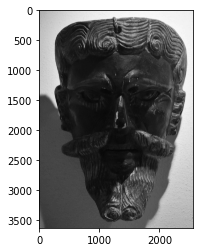

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image, ImageFilter

DATADIR = "/home/dariel/Escritorio/git/ML_HectorS_2021/Mascaras/Modelo"
CATEGORIES = ["Humano", "NoHumano"]

for category in CATEGORIES:
    path = os.path.join (DATADIR, category) # path a nuestras carpetas de clasificación
    for img in os.listdir(path):
        img_array = cv2.imread (os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [2]:
print(img_array)
print(img_array.shape)

[[168 167 167 ... 237 237 237]
 [171 170 170 ... 238 238 238]
 [171 171 172 ... 239 239 238]
 ...
 [116 118 116 ... 170 170 170]
 [116 117 114 ... 170 169 170]
 [116 115 112 ... 170 169 168]]
(3629, 2569)


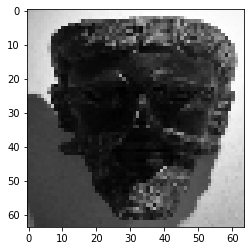

In [3]:
IMG_SIZE = 64
filtro = 9

new_array = cv2.blur(img_array,(filtro, filtro))
new_array = cv2.resize(new_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [4]:
IMG_SIZE = 64
filtro = 3
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join (DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread (os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.medianBlur(img_array,filtro)
                new_array = cv2.resize(new_array, (IMG_SIZE, IMG_SIZE))
                #plt.imshow(new_array, cmap = 'gray')
                #plt.show()
                #print(new_array)
                #print(new_array.shape)
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [5]:
print(len(training_data))

817


[array([[169, 175, 181, ..., 240, 239, 236],
       [176, 184, 189, ..., 239, 240, 239],
       [178, 183, 190, ..., 241, 241, 238],
       ...,
       [104,  82,  59, ..., 167, 182, 177],
       [101,  91,  64, ..., 175, 170, 180],
       [112, 100,  59, ..., 174, 177, 178]], dtype=uint8), 0]


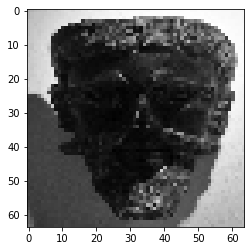

In [6]:
print(training_data[0])
plt.imshow(training_data[0][0], cmap = 'gray')
plt.show()

[array([[29, 24, 25, ..., 24, 23, 22],
       [24, 22, 27, ..., 28, 23, 22],
       [20, 20, 25, ..., 25, 26, 22],
       ...,
       [38, 36, 32, ..., 65, 55, 49],
       [41, 38, 33, ..., 67, 70, 71],
       [49, 40, 38, ..., 63, 63, 62]], dtype=uint8), 0]


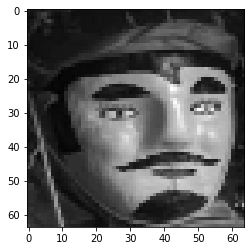

In [7]:
print(training_data[130])
plt.imshow(training_data[130][0], cmap = 'gray')
plt.show()

In [8]:
import random 

random.shuffle(training_data)

In [9]:
for sample in training_data:
    print(sample[1])

1
0
0
1
0
1
1
0
1
1
1
1
1
0
0
0
0
1
1
1
0
1
1
0
1
1
1
0
1
1
0
0
0
0
0
0
0
1
1
0
0
1
0
1
1
1
0
1
0
1
0
0
0
0
0
0
0
1
1
1
0
1
1
1
1
0
1
0
0
0
0
0
0
0
1
0
1
1
1
1
1
0
1
0
0
1
1
0
1
1
0
0
1
0
0
1
1
0
1
1
0
1
0
0
0
0
1
1
0
1
1
0
0
0
0
1
1
1
1
0
1
0
0
1
1
1
0
0
1
0
0
0
0
0
0
0
1
1
0
1
0
0
1
1
1
0
0
1
1
1
0
0
0
0
1
0
1
0
0
0
0
0
1
1
0
1
0
1
1
0
1
0
1
0
0
0
0
1
0
0
1
0
1
1
0
0
1
1
1
1
1
0
1
0
0
1
1
0
1
0
1
1
0
0
0
0
0
1
1
1
1
0
1
0
0
0
1
0
0
0
1
0
1
1
0
0
1
1
1
0
1
0
0
1
1
0
0
1
1
1
0
1
1
1
0
0
1
1
0
0
1
1
0
0
0
1
0
1
0
1
0
0
0
1
0
1
1
1
1
1
0
0
1
1
0
1
0
1
1
1
1
0
1
1
1
1
1
1
1
0
1
0
0
0
0
0
1
1
0
1
0
1
1
1
1
0
1
0
0
0
0
0
1
1
1
0
0
0
0
1
0
0
0
0
0
0
0
0
1
1
1
1
1
1
0
1
0
1
1
0
0
0
1
1
1
0
1
1
0
1
0
1
0
0
1
0
1
0
1
0
1
1
0
0
0
1
1
0
0
0
0
0
1
0
1
0
1
1
0
0
0
0
1
1
1
0
0
1
1
1
0
0
0
0
1
1
1
1
0
1
1
1
1
0
1
0
1
1
1
1
0
0
0
1
1
1
1
1
1
0
0
1
0
1
1
0
0
0
1
1
0
0
0
1
1
0
1
0
1
1
1
0
0
0
0
0
1
0
1
0
1
0
1
1
1
1
1
1
1
0
0
0
1
0
0
1
0
1
1
1
1
1
0
1
0
1
0
1
1
1
1
0
0
1
1
1
1
1
0
0
1
1
0
0
1
1
0
1
0
1


In [10]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [11]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [12]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [13]:
X[3]


array([[[177],
        [173],
        [176],
        ...,
        [139],
        [135],
        [136]],

       [[177],
        [181],
        [177],
        ...,
        [133],
        [131],
        [140]],

       [[176],
        [179],
        [177],
        ...,
        [145],
        [143],
        [141]],

       ...,

       [[210],
        [210],
        [208],
        ...,
        [195],
        [208],
        [185]],

       [[204],
        [204],
        [205],
        ...,
        [212],
        [203],
        [211]],

       [[187],
        [169],
        [180],
        ...,
        [219],
        [214],
        [217]]], dtype=uint8)

In [14]:
print(y)

[1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0
 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0
 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 0 1 1
 0 0 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 1
 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0
 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0
 1 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0
 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0
 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1
 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0
 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1
 0 0 1 1 1 1 1 0 0 1 1 0 